### Анализ поведения самцов корюшки

**1. Загрузить данные**

In [4]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from factor_analyzer import FactorAnalyzer, calculate_kmo
 import seaborn as sns
 from matplotlib import cm
 from sklearn import preprocessing

In [5]:
 df = pd.read_csv('stickleback.csv', sep=';', decimal=',')
 df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


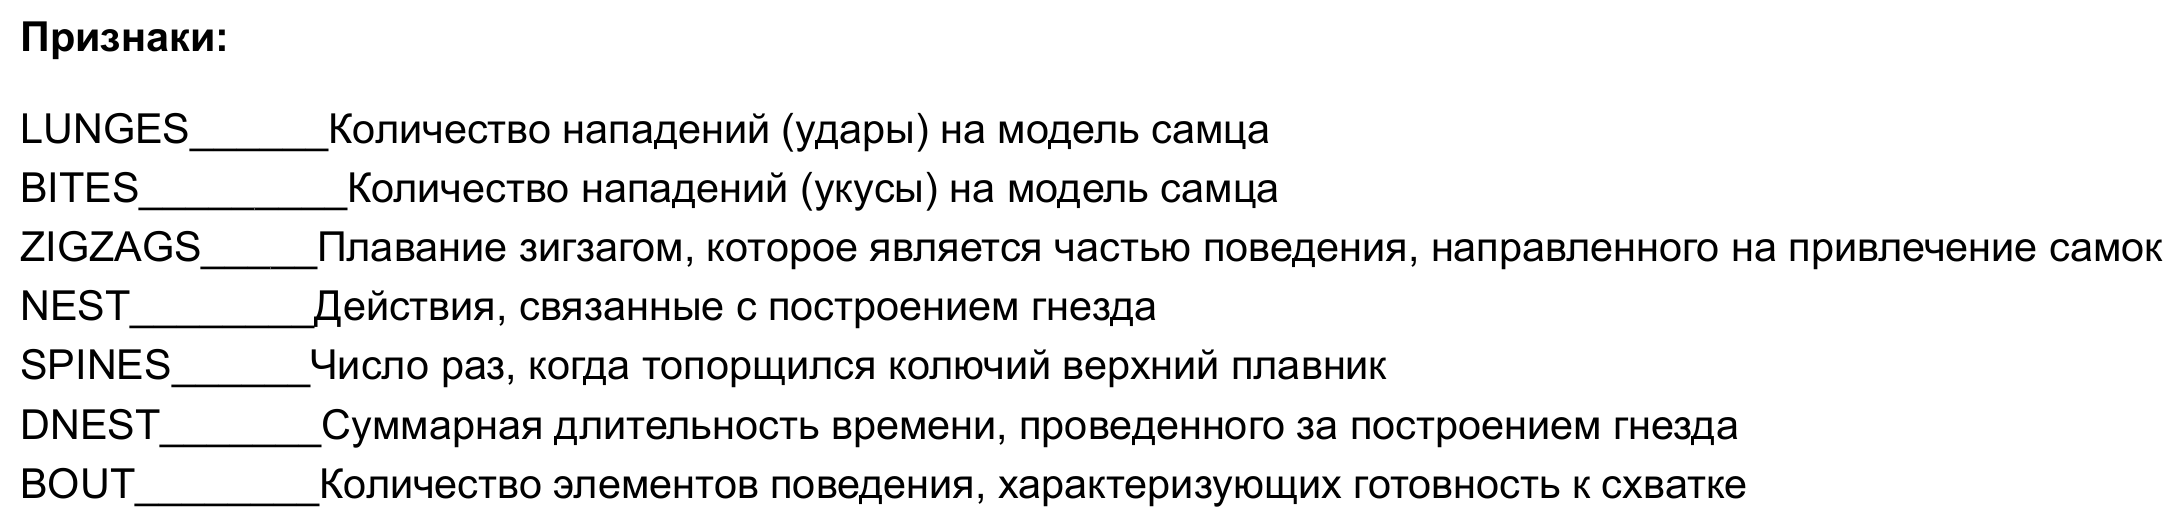

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LUNGES   54 non-null     float64
 1   BITES    54 non-null     float64
 2   ZIGZAGS  54 non-null     float64
 3   NEST     54 non-null     float64
 4   SPINES   54 non-null     float64
 5   DNEST    54 non-null     float64
 6   BOUT     54 non-null     float64
dtypes: float64(7)
memory usage: 3.1 KB


 **2. Получить сводку статистических данных**

In [9]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


**3. Построить матрицу диаграмм рассеяния**

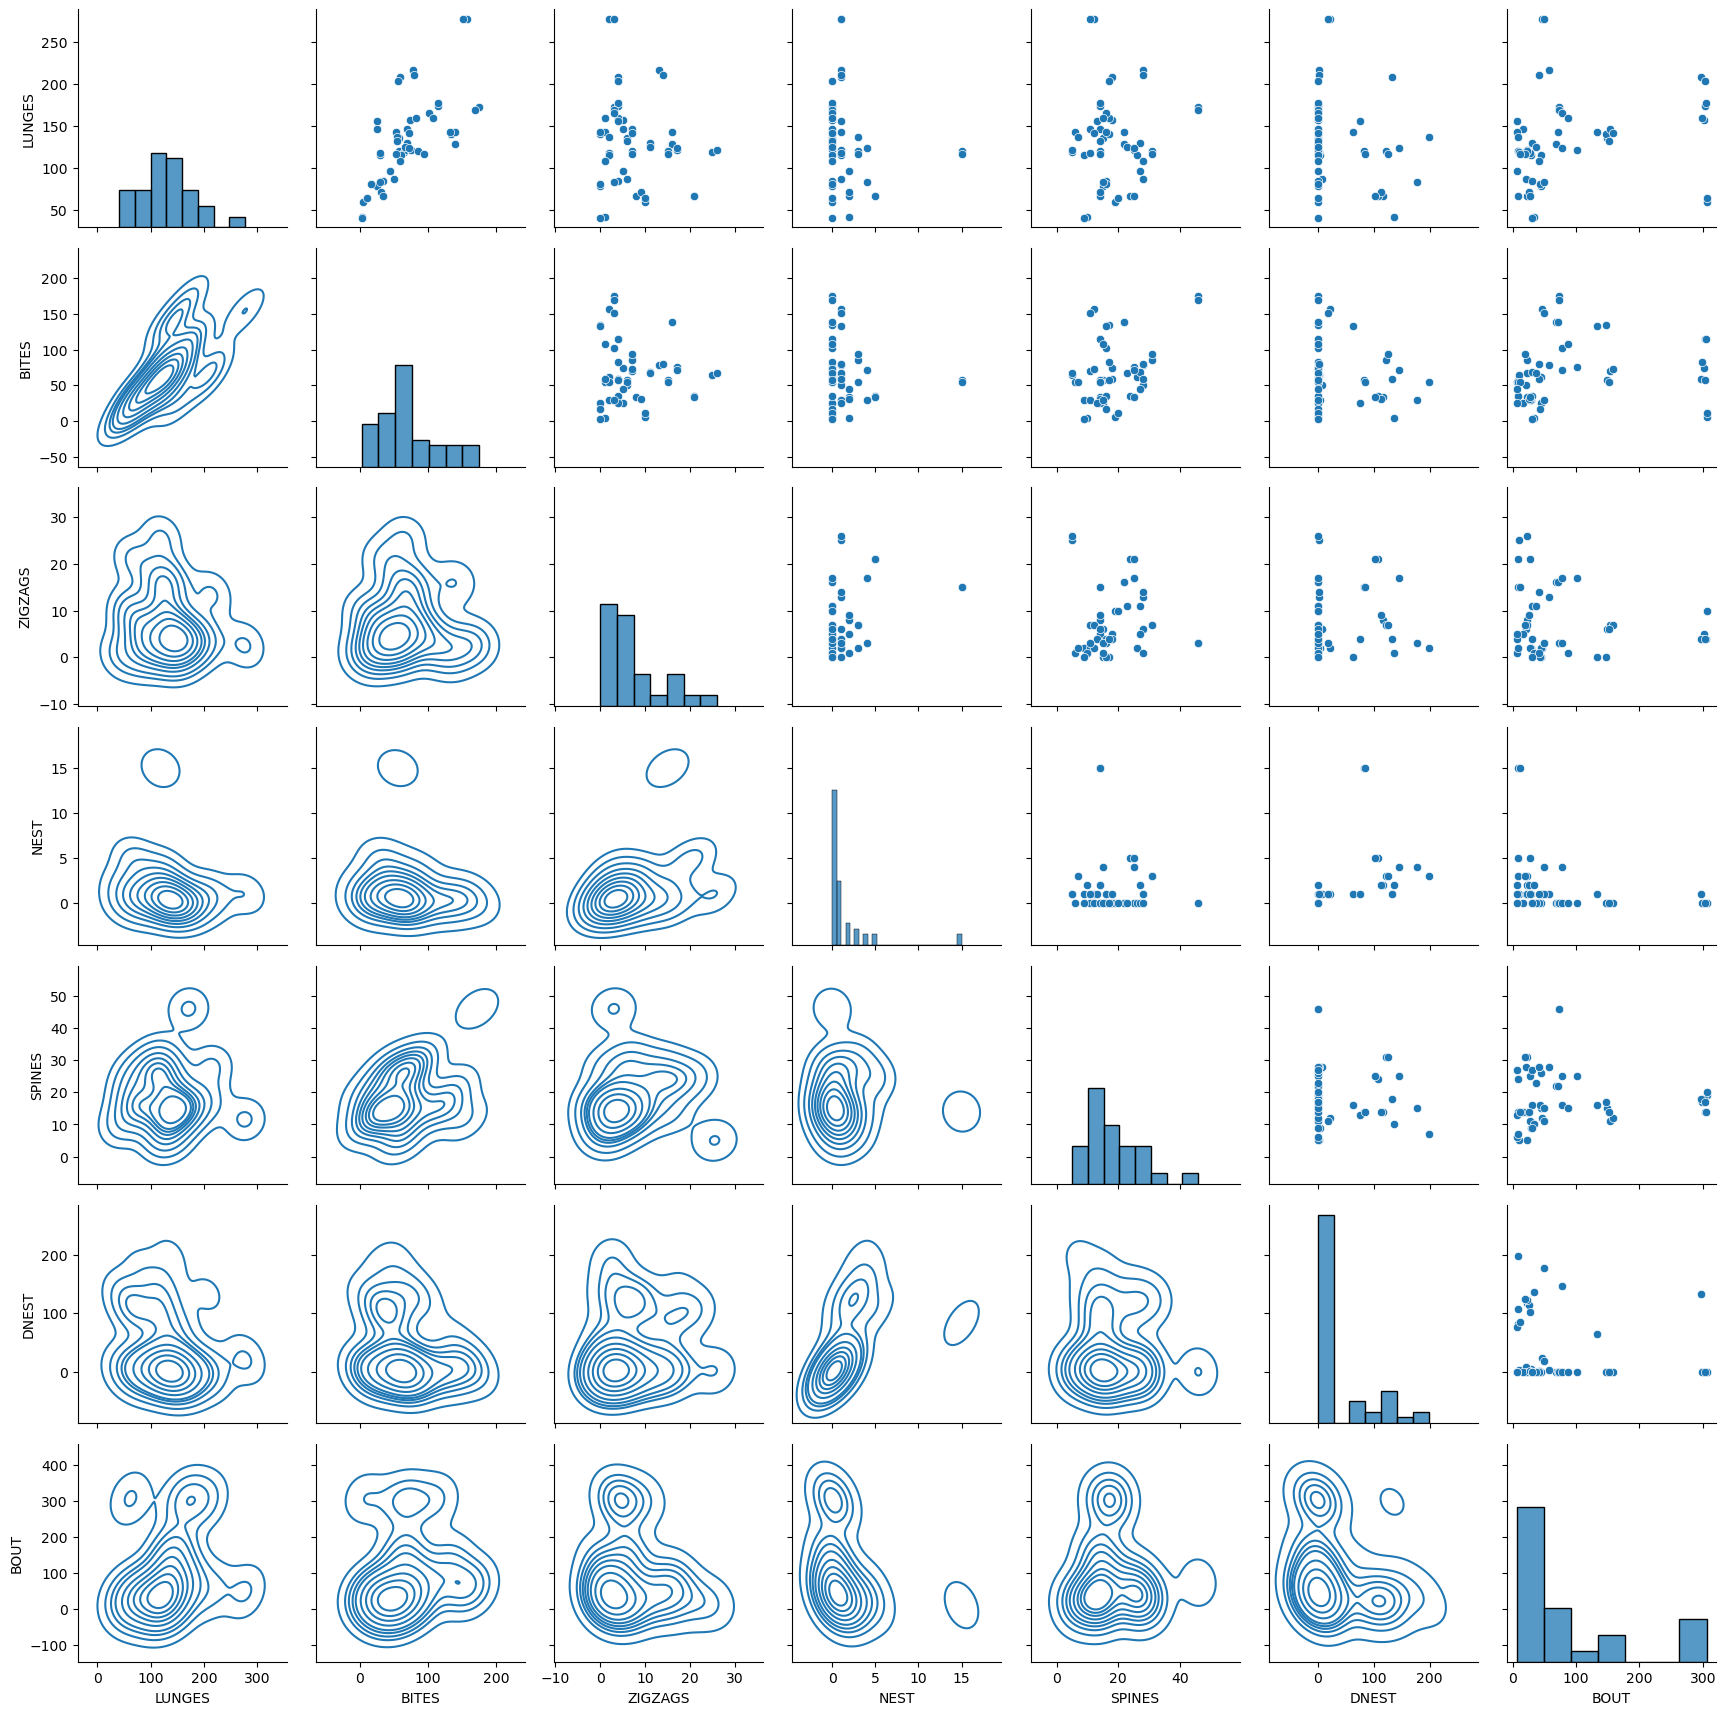

In [11]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)    
g.map_diag(sns.histplot) 
plt.show()

**4. Найти корреляционную матрицу**

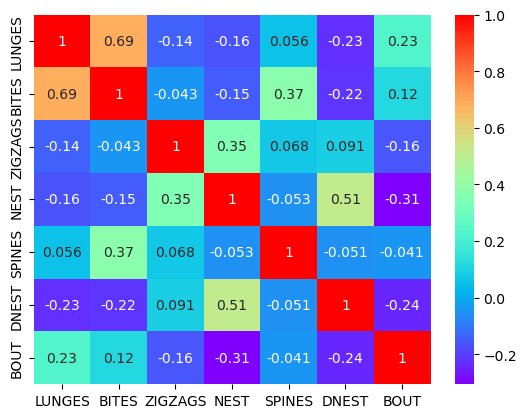

In [13]:
sns.heatmap(df.corr(), annot=True,cmap='rainbow')
plt.show()

**5. Вычислить значение общего КМО и КМО каждого признака. Сделать вывод о возможности факторного анализа данных**

In [15]:
kmo_score = calculate_kmo(df)

In [16]:
print("Общий KMO:", np.round(kmo_score[1], 2))
for i in range(len(kmo_score[0])):
    print(f'KMO признакa {i}:', np.round(kmo_score[0][i], 2))

Общий KMO: 0.54
KMO признакa 0: 0.5
KMO признакa 1: 0.49
KMO признакa 2: 0.55
KMO признакa 3: 0.58
KMO признакa 4: 0.35
KMO признакa 5: 0.63
KMO признакa 6: 0.77


**6. Удалить из матрицы данных непригодные для анализа признаки и пересчитать КМО**

In [18]:
df_clear = df.drop(columns='SPINES')

In [19]:
kmo_variables, kmo_score = calculate_kmo(df_clear)
print("Общий KMO:", np.round(kmo_score, 2))
for i in range(len(kmo_variables)):
    print(f'KMO признакa {i}:', np.round(kmo_variables[i], 2))

Общий KMO: 0.58
KMO признакa 0: 0.55
KMO признакa 1: 0.54
KMO признакa 2: 0.53
KMO признакa 3: 0.58
KMO признакa 4: 0.62
KMO признакa 5: 0.75


**7. Стандартизовать данные и вывести отчет о стандартизованных данных**

In [21]:
df_norm = (df_clear - np.mean(df_clear, axis=0)) / np.std(df_clear, axis=0)
df_norm.describe()

,LUNGES,BITES,ZIGZAGS,NEST,DNEST,BOUT
count,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,-1.007425e-16,-3.700743e-17,-4.111937e-17,4.523131e-17,-1.233581e-17,5.345518e-17
std,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00
min,-1.792990e+00,-1.535308e+00,-1.097436e+00,-4.796693e-01,-6.121479e-01,-8.522228e-01
25%,-6.398802e-01,-8.089746e-01,-7.581522e-01,-4.796693e-01,-6.121479e-01,-6.732163e-01
50%,-8.320652e-02,-2.104754e-01,-3.434723e-01,-4.796693e-01,-6.121479e-01,-4.532939e-01
75%,5.082593e-01,3.531597e-01,5.235858e-01,-1.432778e-01,6.922234e-01,3.650219e-01
max,2.898974e+00,2.462433e+00,2.823174e+00,4.566203e+00,2.943604e+00,2.216461e+00


**8. Найти матрицу факторных нагрузок для двух факторов без вращения. Отобразить признаки в факторном пространстве.**

In [23]:
def plot_factor_space(loadings_df):
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    
    plt.axhline(0, color='b')
    plt.axvline(0, color='b')
    
    plt.grid(True, linestyle='--', alpha=0.5)
    
    points = {
        feature: loadings_df.loc[feature] for feature in df_norm.columns
    }
    
    for label, (x, y) in points.items():
        plt.scatter(x, y, color='red')
        plt.text(x, y+0.1, label, ha='center', fontsize=10)
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.title('Факторное пространоство', fontsize=14)
    
    plt.xticks([-1.0, -0.5, 0, 0.5, 1.0])
    plt.yticks([-1.0, -0.5, 0, 0.5, 1.0])
    plt.tight_layout()
    plt.show()


Матрица факторных нагрузок:
         Фактор_1  Фактор_2
LUNGES   0.800404  0.597098
BITES    0.564743  0.390542
ZIGZAGS -0.271865  0.186621
NEST    -0.724032  0.688822
DNEST   -0.482530  0.222591
BOUT     0.357349 -0.116423


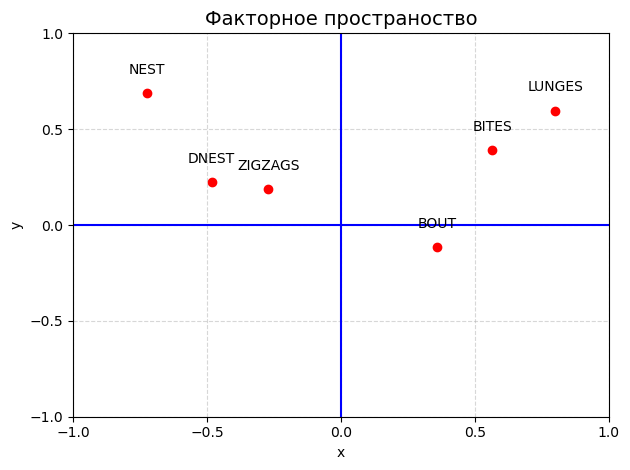

In [24]:
fa = FactorAnalyzer(n_factors=2, rotation=None, method='minres')
fa.fit(df_norm)
loadings_df = pd.DataFrame(fa.loadings_, 
                          index=df_norm.columns, 
                          columns=[f'Фактор_{i+1}' for i in range(2)])

print("\nМатрица факторных нагрузок:")
print(loadings_df)
plot_factor_space(loadings_df)

**9. Найти матрицу факторных нагрузок для двух факторов с вращением varimax. Отобразить признаки в факторном пространстве. Найти
общности.**


Матрица факторных нагрузок:
         Фактор_1  Фактор_2
LUNGES  -0.167943  0.984361
BITES   -0.139703  0.672266
ZIGZAGS  0.325579 -0.052310
NEST     0.999349 -0.000395
DNEST    0.502952 -0.171525
BOUT    -0.339084  0.162096


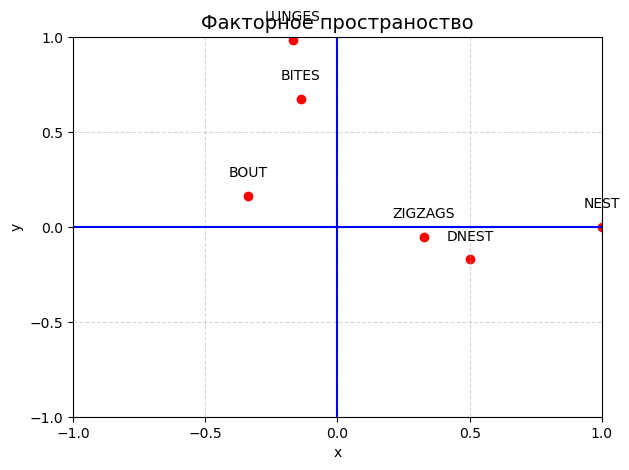

In [26]:
fa_varimax = FactorAnalyzer(n_factors=2, rotation='varimax', method='minres')
fa_varimax.fit(df_norm)
loadings_varimax = pd.DataFrame(fa_varimax.loadings_, 
                          index=df_norm.columns, 
                          columns=[f'Фактор_{i+1}' for i in range(2)])

print("\nМатрица факторных нагрузок:")
print(loadings_varimax)
plot_factor_space(loadings_varimax)

In [27]:
print(pd.DataFrame(data=fa_varimax.get_communalities(),
               index=df_norm.columns,
               columns=['Общности']) )

         Общности
LUNGES   0.997172
BITES    0.471458
ZIGZAGS  0.108738
NEST     0.998698
DNEST    0.282382
BOUT     0.141253


**10. Найти матрицу факторных нагрузок для двух факторов с вращением quartimax . Отобразить признаки в факторном
пространстве.Найти общности.**


Матрица факторных нагрузок:
         Фактор_1  Фактор_2
LUNGES   0.994964 -0.084966
BITES    0.681600 -0.082946
ZIGZAGS -0.079376  0.320059
NEST    -0.084037  0.995809
DNEST   -0.213019  0.486831
BOUT     0.189907 -0.324327


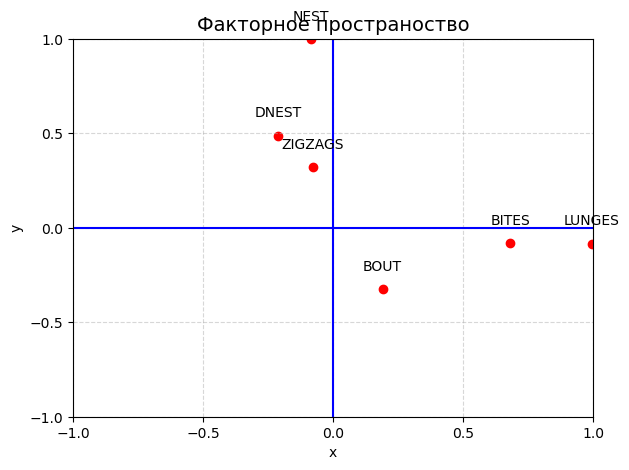

In [29]:
fa_quartimax = FactorAnalyzer(n_factors=2, rotation='quartimax', method='minres')
fa_quartimax.fit(df_norm)
loadings_quartimax = pd.DataFrame(fa_quartimax.loadings_, 
                          index=df_norm.columns, 
                          columns=[f'Фактор_{i+1}' for i in range(2)])

print("\nМатрица факторных нагрузок:")
print(loadings_quartimax)
plot_factor_space(loadings_quartimax)

In [30]:
print(pd.DataFrame(data=fa_quartimax.get_communalities(),
               index=df_norm.columns,
               columns=['Общности']) )

         Общности
LUNGES   0.997172
BITES    0.471458
ZIGZAGS  0.108738
NEST     0.998698
DNEST    0.282382
BOUT     0.141253
